In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv(r'C:\Users\Mauriceia\Documents\DataAnalytcs_micro-cred\diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
# df.Pregnancies.value_counts()
# df.Glucose.value_counts()
# df.BloodPressure.value_counts()
# df.SkinThickness.value_counts()
# df.Insulin.value_counts()
# df.BMI.value_counts()
# df.DiabetesPedigreeFunction.value_counts()
# df.Age.value_counts()
# df.Outcome.value_counts()

In [5]:
df = df.reindex(columns=['Outcome', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
                        'DiabetesPedigreeFunction', 'Age'])

In [6]:
outcome_mask = df['Outcome'] == 1

In [23]:
df[outcome_mask].Age.value_counts()

25    14
31    13
41    13
29    13
43    11
22    11
28    10
33    10
38    10
36    10
32     9
27     8
24     8
45     8
26     8
23     7
46     7
52     7
42     7
30     6
40     6
37     6
21     5
44     5
35     5
50     5
51     5
53     4
47     4
34     4
54     4
39     3
58     3
49     3
66     2
62     2
56     2
60     2
59     2
70     1
55     1
61     1
67     1
57     1
48     1
Name: Age, dtype: int64

In [8]:
# sns.pairplot(df)

In [9]:
# df.corr()

<AxesSubplot:>

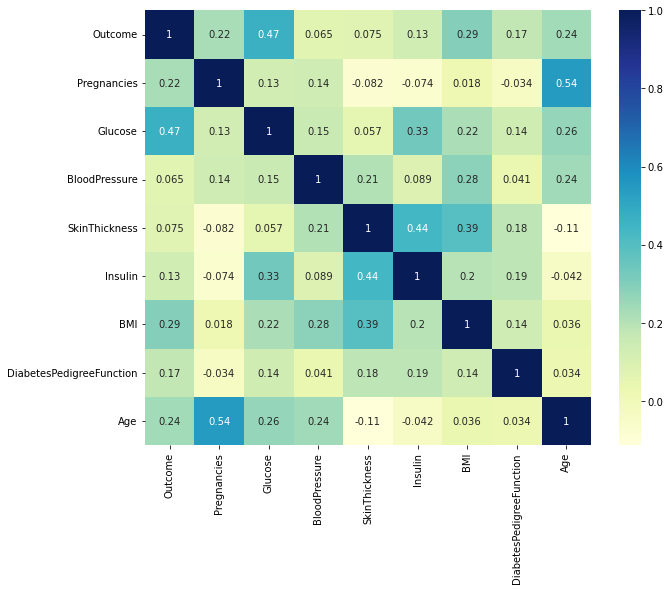

In [10]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [11]:
X = df.drop(columns = 'Outcome', axis=1)
Y = df['Outcome']

In [12]:
scaler = StandardScaler()

In [13]:
scaler.fit(X)

StandardScaler()

In [14]:
standardized_data = scaler.transform(X)

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [16]:
classifier = svm.SVC(kernel='linear')

In [17]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [18]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [19]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7833876221498371


In [22]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [21]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


In [ ]:
# In my EDA I was able to find that the most common age that someone was diagnosed with diabetes is 25 years old.
# I also found that the most correlated feature with having diabetes is the glucose level.
# In addition, I found that skin thickness was also fairly correlated with insulin.